Data Cleaning and Preparation

Problem Statement: Analyzing Customer Churn in a Telecommunications
Company
Dataset: "Telecom_Customer_Churn.csv"
Description: The dataset contains information about customers of a
telecommunicationscompany and whether they have churned (i.e., discontinued their
services). The dataset includes various attributes of the customers, such as their
demographics, usage patterns, and account information. The goal is to perform data
cleaning and preparation to gain insights into the factors that contribute to customer
churn.
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Removeany duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
andstandardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predictingcustomer churn.
9. Normalize or scale the data if necessary.
10. Split the dataset into training and testing sets for further analysis.
11. Export thecleaned dataset for future analysis or modeling.

84

9 B4 Data Wrangling

Problem Statement:

In [1]:
import pandas as pd #data manipulation
import numpy as np #numerical computations
from sklearn.model_selection import train_test_split 

 

In [2]:
df= pd.read_csv("telecom_customer_churn.csv")

In [3]:
df.sample(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
3544,5022-KVDQT,Male,20,No,0,Woodland Hills,91364,34.153733,-118.593408,0,...,Bank Withdrawal,81.30,2272.80,29.93,130,688.77,3061.64,Stayed,NaN,NaN
2381,3410-MHHUM,Female,40,Yes,2,San Francisco,94111,37.801776,-122.402293,4,...,Bank Withdrawal,94.40,4295.35,0.00,40,1087.24,5422.59,Stayed,NaN,NaN
859,1247-QBVSH,Female,41,Yes,2,Santa Margarita,93453,35.303926,-120.256567,1,...,Mailed Check,50.20,2169.40,0.00,0,629.52,2798.92,Stayed,NaN,NaN
3341,4760-THGOT,Female,33,Yes,0,San Jose,95134,37.427650,-121.945416,9,...,Bank Withdrawal,94.10,4107.30,0.00,0,2127.64,6234.94,Stayed,NaN,NaN
7004,9938-TKDGL,Male,38,Yes,3,Llano,93544,34.500091,-117.765862,9,...,Bank Withdrawal,99.55,6668.00,0.00,0,2635.00,9303.00,Stayed,NaN,NaN


In [4]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [8]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [9]:
from sklearn.impute import SimpleImputer




In [10]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [11]:
# Impute numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to the numerical columns
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Apply imputation to the categorical columns
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [12]:
# Check for any remaining missing values
print(df.isnull().sum())


Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [13]:
#df.dropna(inplace=True) optional

In [14]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [19]:
df.duplicated().sum()

0

In [22]:
df.drop_duplicates(inplace=True)

In [24]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
54,0094-OIFMO,Female,78,No,1,North Hollywood,91605,34.207295,-118.400022,0,...,Bank Withdrawal,95.00,1120.30,0.0,120,127.49,1367.79,Churned,Dissatisfaction,Product dissatisfaction
67,0112-QWPNC,Male,61,Yes,0,Valyermo,93563,34.395830,-117.734568,1,...,Bank Withdrawal,84.35,4059.35,0.0,0,1937.95,5997.30,Churned,Competitor,Competitor offered higher download speeds
77,0125-LZQXK,Male,42,No,0,Big Oak Flat,95305,37.818589,-120.256995,0,...,Bank Withdrawal,101.35,1553.95,0.0,0,688.80,2242.75,Churned,Attitude,Attitude of service provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,9940-RHLFB,Female,53,No,0,Sunset Beach,90742,33.719221,-118.073596,0,...,Bank Withdrawal,75.30,75.30,0.0,0,26.06,101.36,Churned,Competitor,Competitor made better offer
7010,9944-HKVVB,Female,55,No,0,King City,93930,36.220761,-120.980777,0,...,Bank Withdrawal,95.10,307.40,0.0,0,142.86,450.26,Churned,Competitor,Competitor had better devices
7012,9947-OTFQU,Male,65,No,0,Covina,91722,34.097345,-117.906736,0,...,Bank Withdrawal,74.40,1074.30,0.0,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 2 to 7039
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        681 non-null    object 
 1   Gender                             681 non-null    object 
 2   Age                                681 non-null    int64  
 3   Married                            681 non-null    object 
 4   Number of Dependents               681 non-null    int64  
 5   City                               681 non-null    object 
 6   Zip Code                           681 non-null    int64  
 7   Latitude                           681 non-null    float64
 8   Longitude                          681 non-null    float64
 9   Number of Referrals                681 non-null    int64  
 10  Tenure in Months                   681 non-null    int64  
 11  Offer                              681 non-null    object 
 12

In [26]:
import seaborn as sns 

<Axes: ylabel='Total Extra Data Charges'>

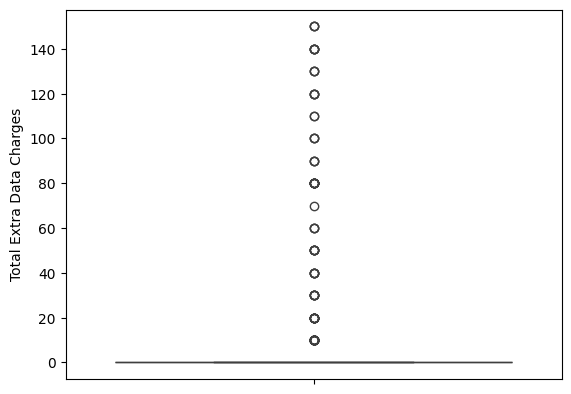

In [28]:
sns.boxplot(df['Total Extra Data Charges'])

In [29]:
Q1 = df['Total Extra Data Charges'].quantile(0.25)
Q3 = df['Total Extra Data Charges'].quantile(0.75)

In [30]:

IQR = Q3- Q1

In [31]:
upper_l = Q3 + 1.5 * IQR
lower_l = Q1 - 1.5 * IQR

In [32]:
df[df['Total Extra Data Charges'] > upper_l]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
54,0094-OIFMO,Female,78,No,1,North Hollywood,91605,34.207295,-118.400022,0,...,Bank Withdrawal,95.00,1120.30,0.00,120,127.49,1367.79,Churned,Dissatisfaction,Product dissatisfaction
110,0195-IESCP,Male,26,Yes,0,Armona,93202,36.315979,-119.710852,1,...,Bank Withdrawal,85.25,855.30,0.00,100,20.20,975.50,Churned,Competitor,Competitor offered more data
363,0533-BNWKF,Female,66,Yes,0,San Diego,92122,32.857230,-117.209774,2,...,Bank Withdrawal,85.45,4874.70,0.00,90,2355.10,7319.80,Churned,Competitor,Competitor made better offer
592,0870-VEMYL,Female,34,No,0,Columbia,95310,38.085839,-120.378550,0,...,Credit Card,53.85,259.80,22.96,10,121.60,368.44,Churned,Competitor,Competitor offered higher download speeds
631,0927-LCSMG,Male,23,No,0,San Jose,95129,37.305622,-122.000887,0,...,Mailed Check,74.65,544.55,0.00,10,151.06,705.61,Churned,Competitor,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,9488-HGMJH,Female,78,No,0,Indian Wells,92210,33.537646,-116.291089,0,...,Bank Withdrawal,71.15,71.15,0.00,20,24.75,115.90,Churned,Competitor,Competitor made better offer
6743,9574-RKJIF,Male,52,Yes,0,Trabuco Canyon,92679,33.631119,-117.567346,1,...,Bank Withdrawal,94.40,2838.70,0.00,80,865.50,3784.20,Churned,Competitor,Competitor offered higher download speeds
6821,9689-PTNPG,Male,42,No,0,San Diego,92126,32.886925,-117.152162,0,...,Bank Withdrawal,80.25,144.55,0.00,10,78.06,232.61,Churned,Competitor,Competitor made better offer
6911,9809-IMGCQ,Male,65,No,0,Canyon Dam,95923,40.171312,-121.120605,0,...,Bank Withdrawal,96.70,2082.95,0.00,100,883.96,3066.91,Churned,Competitor,Competitor made better offer


In [33]:
df[df['Total Extra Data Charges'] < lower_l]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason


In [37]:
parth=df[(df['Total Extra Data Charges'] <= upper_l ) & (df['Total Extra Data Charges'] >= lower_l)]

<Axes: ylabel='Total Extra Data Charges'>

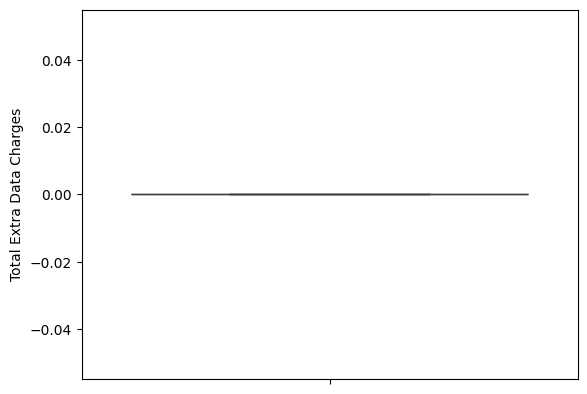

In [38]:
sns.boxplot(parth['Total Extra Data Charges'])

In [39]:
df['Avg Charges Per Month'] = df['Total Charges'] / df['Tenure in Months']

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
numerical_columns = ['Monthly Charge', 'Total Charges', 'Avg Charges Per Month']

In [42]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [43]:
from sklearn.model_selection import train_test_split


In [45]:
X= df.drop(['Churn Category'],axis=1)
y=df['Churn Category']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)


NameError: name 'df' is not defined